<a href="https://colab.research.google.com/github/mburkey3/Intro_to_ML/blob/main/Homework5/Homework5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.optim as optim
from matplotlib import pyplot as plt

In [ ]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
# convert to tensors
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

t_un = t_u * 0.01

In [ ]:
# (A)
# Define the models
def model_nonLin(t_u, w1, w2, b) :
    return w2 * t_u ** 2 + w1 * t_u + b

def model_lin(t_u, w, b) :
    return w * t_u + b

In [ ]:
# Set up loss function
def loss_fn(t_p, t_c) :
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [ ]:
# Set up parameters and optimizers
nonLin_parameters = torch.tensor([1.0, 0.0, 0.0], requires_grad=True) # w0 w1 w2
lin_parameters = torch.tensor([1.0, 0.0], requires_grad=True)

lr = 0.1
nonLinOpt_SGD = optim.SGD([nonLin_parameters], lr=lr)
linOpt_SGD = optim.SGD([lin_parameters], lr=lr)
nonLinOpt_ADAM = optim.Adam([nonLin_parameters], lr=lr)
linOpt_ADAM = optim.Adam([lin_parameters], lr=lr)

In [ ]:
# Training Function
def training_nonLin(epochs, opt, params, t_u, t_c) :
    for epoch in range(1, epochs + 1):
        t_p = model_nonLin(t_u, *params)
        loss = loss_fn(t_p, t_c)

        opt.zero_grad()
        loss.backward()
        opt.step()

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))

    return params

# build autograd loop from notes/textbook for original linear model
def training_lin(epochs, lr, params, t_u, t_c) :
    for epoch in range(1, epochs + 1):
        if params.grad is not None:
            params.grad.zero_()

        t_p = model_lin(t_u, *params)
        loss = loss_fn(t_p, t_c)
        loss.backward()

        with torch.no_grad():
            params -= lr * params.grad

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))

    return params

In [ ]:
# (B) Training the non-linear model with different rates
# Training 1: SGD, Learning rate = 0.1
training_nonLin(
    epochs = 5000,
    opt = nonLinOpt_SGD,
    params = nonLin_parameters,
    t_u = t_un,
    t_c = t_c
)

Epoch 500, Loss 2.109275
Epoch 1000, Loss 2.090864
Epoch 1500, Loss 2.090846
Epoch 2000, Loss 2.090837
Epoch 2500, Loss 2.090825
Epoch 3000, Loss 2.090814
Epoch 3500, Loss 2.090805
Epoch 4000, Loss 2.090796
Epoch 4500, Loss 2.090790
Epoch 5000, Loss 2.090784


tensor([ 25.0192,  28.0565, -10.7108], requires_grad=True)

In [ ]:
# Training 2: SGD Learning rate = 0.01
lr = 0.01
nonLinOpt_SGD = optim.SGD([nonLin_parameters], lr=lr)
training_nonLin(
    epochs = 5000,
    opt = nonLinOpt_SGD,
    params = nonLin_parameters,
    t_u = t_un,
    t_c = t_c
)

Epoch 500, Loss 2.090782
Epoch 1000, Loss 2.090782
Epoch 1500, Loss 2.090782
Epoch 2000, Loss 2.090780
Epoch 2500, Loss 2.090780
Epoch 3000, Loss 2.090780
Epoch 3500, Loss 2.090780
Epoch 4000, Loss 2.090780
Epoch 4500, Loss 2.090779
Epoch 5000, Loss 2.090779


tensor([ 25.0096,  28.0661, -10.7087], requires_grad=True)

In [ ]:
# Training 3: SGD, Learning rate = 0.001
lr = 0.001
nonLinOpt_SGD = optim.SGD([nonLin_parameters], lr=lr)
training_nonLin(
    epochs = 5000,
    opt = nonLinOpt_SGD,
    params = nonLin_parameters,
    t_u = t_un,
    t_c = t_c
)

Epoch 500, Loss 2.090777
Epoch 1000, Loss 2.090777
Epoch 1500, Loss 2.090777
Epoch 2000, Loss 2.090777
Epoch 2500, Loss 2.090777
Epoch 3000, Loss 2.090777
Epoch 3500, Loss 2.090777
Epoch 4000, Loss 2.090777
Epoch 4500, Loss 2.090777
Epoch 5000, Loss 2.090777


tensor([ 25.0096,  28.0661, -10.7087], requires_grad=True)

In [ ]:
# Training 4: SGD, Learning rate = 0.0001
lr = 0.0001
nonLinOpt_SGD = optim.SGD([nonLin_parameters], lr=lr)
training_nonLin(
    epochs = 5000,
    opt = nonLinOpt_SGD,
    params = nonLin_parameters,
    t_u = t_un,
    t_c = t_c
)

Epoch 500, Loss 2.090777
Epoch 1000, Loss 2.090777
Epoch 1500, Loss 2.090777
Epoch 2000, Loss 2.090777
Epoch 2500, Loss 2.090777
Epoch 3000, Loss 2.090777
Epoch 3500, Loss 2.090777
Epoch 4000, Loss 2.090777
Epoch 4500, Loss 2.090777
Epoch 5000, Loss 2.090777


tensor([ 25.0096,  28.0661, -10.7087], requires_grad=True)

In [ ]:
# Training 1: ADAM, Learning rate = 0.1
lr = 0.1
nonLinOpt_ADAM = optim.Adam([nonLin_parameters], lr=lr)
training_nonLin(
    epochs = 5000,
    opt = nonLinOpt_ADAM,
    params = nonLin_parameters,
    t_u = t_un,
    t_c = t_c
)

Epoch 500, Loss 2.090718
Epoch 1000, Loss 2.090720
Epoch 1500, Loss 2.090718
Epoch 2000, Loss 2.090719
Epoch 2500, Loss 2.090719
Epoch 3000, Loss 2.090718
Epoch 3500, Loss 2.090719
Epoch 4000, Loss 2.090718
Epoch 4500, Loss 2.090717
Epoch 5000, Loss 2.090721


tensor([ 24.7601,  28.3040, -10.6500], requires_grad=True)

In [ ]:
# Training 2: ADAM, Learning rate = 0.01
lr = 0.01
nonLinOpt_ADAM = optim.Adam([nonLin_parameters], lr=lr)
training_nonLin(
    epochs = 5000,
    opt = nonLinOpt_ADAM,
    params = nonLin_parameters,
    t_u = t_un,
    t_c = t_c
)

Epoch 500, Loss 2.090719
Epoch 1000, Loss 2.090719
Epoch 1500, Loss 2.090719
Epoch 2000, Loss 2.090719
Epoch 2500, Loss 2.090718
Epoch 3000, Loss 2.090718
Epoch 3500, Loss 2.090717
Epoch 4000, Loss 2.090718
Epoch 4500, Loss 2.090718
Epoch 5000, Loss 2.090719


tensor([ 24.7605,  28.3044, -10.6495], requires_grad=True)

In [ ]:
# Training 3: ADAM, Learning rate = 0.001
lr = 0.001
nonLinOpt_ADAM = optim.Adam([nonLin_parameters], lr=lr)
training_nonLin(
    epochs = 5000,
    opt = nonLinOpt_ADAM,
    params = nonLin_parameters,
    t_u = t_un,
    t_c = t_c
)

Epoch 500, Loss 2.090719
Epoch 1000, Loss 2.090719
Epoch 1500, Loss 2.090719
Epoch 2000, Loss 2.090719
Epoch 2500, Loss 2.090718
Epoch 3000, Loss 2.090718
Epoch 3500, Loss 2.090719
Epoch 4000, Loss 2.090717
Epoch 4500, Loss 2.090719
Epoch 5000, Loss 2.090717


tensor([ 24.7604,  28.3043, -10.6496], requires_grad=True)

In [ ]:
# Training 4: ADAM, Learning rate = 0.0001
lr = 0.0001
nonLinOpt_ADAM = optim.Adam([nonLin_parameters], lr=lr)
training_nonLin(
    epochs = 5000,
    opt = nonLinOpt_ADAM,
    params = nonLin_parameters,
    t_u = t_un,
    t_c = t_c
)

Epoch 500, Loss 2.090719
Epoch 1000, Loss 2.090717
Epoch 1500, Loss 2.090718
Epoch 2000, Loss 2.090718
Epoch 2500, Loss 2.090718
Epoch 3000, Loss 2.090719
Epoch 3500, Loss 2.090719
Epoch 4000, Loss 2.090717
Epoch 4500, Loss 2.090717
Epoch 5000, Loss 2.090719


tensor([ 24.7604,  28.3043, -10.6496], requires_grad=True)

In [ ]:
# (C) "Best" non-linear model = ADAM, lr = 0.001
# Run once again to double check params
lr = 0.001
nonLinOpt_ADAM = optim.Adam([nonLin_parameters], lr=lr)
training_nonLin(
    epochs = 5000,
    opt = nonLinOpt_ADAM,
    params = nonLin_parameters,
    t_u = t_un,
    t_c = t_c
)

Epoch 500, Loss 2.090718
Epoch 1000, Loss 2.090719
Epoch 1500, Loss 2.090717
Epoch 2000, Loss 2.090718
Epoch 2500, Loss 2.090719
Epoch 3000, Loss 2.090718
Epoch 3500, Loss 2.090717
Epoch 4000, Loss 2.090718
Epoch 4500, Loss 2.090719
Epoch 5000, Loss 2.090718


tensor([ 24.7604,  28.3043, -10.6496], requires_grad=True)

In [ ]:
# Linear model and training
training_lin(
    epochs = 5000,
    lr = 0.1,
    params = lin_parameters,
    t_u = t_un,
    t_c = t_c
)

Epoch 500, Loss 2.935577
Epoch 1000, Loss 2.927780
Epoch 1500, Loss 2.927645
Epoch 2000, Loss 2.927643
Epoch 2500, Loss 2.927644
Epoch 3000, Loss 2.927644
Epoch 3500, Loss 2.927644
Epoch 4000, Loss 2.927644
Epoch 4500, Loss 2.927644
Epoch 5000, Loss 2.927644


tensor([ 53.6767, -17.3045], requires_grad=True)

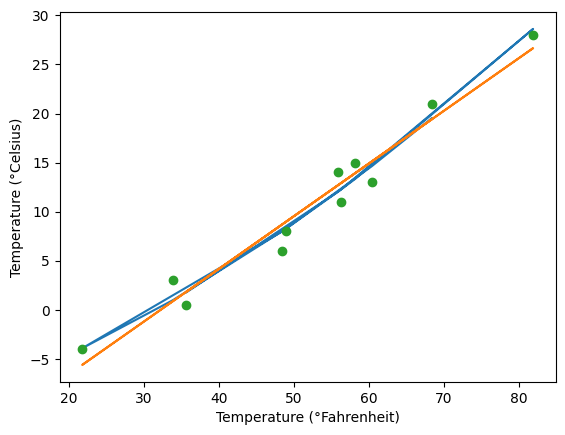

In [ ]:
# Visualizing the data
t_p_non = model_nonLin(t_un, *nonLin_parameters)
t_p_lin = model_lin(t_un, *lin_parameters)

fig = plt.figure()
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p_non.detach().numpy())
plt.plot(t_u.numpy(), t_p_lin.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')